# Linea H

Hipotesis: 
La cercanía a las estaciones de la linea H influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea A y veremos si la distancia a las paradas de esta influye en el precio de las propiedades.
Primer approach: tomamos cada barrio vemos cuales son las distancias de sus propiedades a las paradas, y tomamos la menor. Luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en ésta.

La línea H pasa por: Parque Patricios, San Cristóbal, Balvanera, Boedo, Almagro, y Recoleta

In [1]:
import datetime as datetime
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

#Data de properati
df = pd.read_csv('/home/martin/Documents/jupyter/datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propHF = df[df['state_name']== 'Capital Federal']

propHFf = propHF[['property_type','place_name','rooms','lat','lon','price']]

propRecorridoH= propHFf[propHFf.place_name.str.contains('Parque Patricios') |
                        propHFf.place_name.str.contains('Balvanera')|
                        propHFf.place_name.str.contains('San Cristobal')|
                        propHFf.place_name.str.contains('Boedo')|
                        propHFf.place_name.str.contains('Almagro')|
                        propHFf.place_name.str.contains('Recoleta')]

propRecorridoH.dropna(inplace = True)
propRecorridoH.info()

/home/martin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,4,5,6,9,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4807 entries, 360877 to 493464
Data columns (total 6 columns):
property_type    4807 non-null object
place_name       4807 non-null object
rooms            4807 non-null float64
lat              4807 non-null float64
lon              4807 non-null float64
price            4807 non-null float64
dtypes: float64(4), object(2)
memory usage: 262.9+ KB


/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
df = pd.read_csv('/home/martin/Documents/jupyter/estaciones-de-subte.csv', encoding = "ISO-8859-1")

estacionesH = df[df['LINEA'] == 'H']
estacionesH.head(20)

,X,Y,ID,ESTACION,LINEA
0,-58.398928,-34.635750,1.0,CASEROS,H
1,-58.400970,-34.629376,2.0,INCLAN,H
2,-58.402323,-34.623092,3.0,HUMBERTO 1°,H
3,-58.404732,-34.615242,4.0,VENEZUELA,H
4,-58.406036,-34.608935,5.0,ONCE - 30 DE DICIEMBRE,H
76,-58.405450,-34.604490,77.0,CORRIENTES,H
77,-58.405795,-34.638406,78.0,PARQUE PATRICIOS,H
78,-58.412385,-34.641269,79.0,HOSPITALES,H
83,-58.403721,-34.598455,84.0,CÓRDOBA,H
84,-58.397216,-34.587462,85.0,LAS HERAS,H


In [3]:
i = 1
for index, row in estacionesH.iterrows():
    lon = estacionesH.loc[index,'X']
    lat = estacionesH.loc[index,'Y']
    label = str(i)
    propRecorridoH['lon' + label] = lon
    propRecorridoH['lat' + label] = lat
    i = i+1

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [4]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(np.sin(rad*dlat/2))**2 + np.cos(rad*lat1)*np.cos(rad*lat2)*(np.sin(rad*dlon/2))**2
    distancia=2*R*np.arcsin(np.sqrt(a))
    distM = distancia*1000
    return distM

In [5]:
for row in estacionesH.iterrows():
    for i in range(1,12):
        label = str(i)
        lat1 = propRecorridoH['lat'].astype(float)
        lon1 = propRecorridoH['lon'].astype(float)
        lat2 = propRecorridoH['lat'+ label].astype(float)
        lon2 = propRecorridoH['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoH['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoH['dist' + label] = dist

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
propRecorridoH.head(5)

,property_type,place_name,rooms,lat,lon,price,lon1,lat1,lon2,lat2,...,dist2,dist3,dist4,dist5,dist6,dist7,dist8,dist9,dist10,dist11
360877,apartment,Balvanera,3.0,-34.601861,-58.403538,150000.0,-58.398928,-34.63575,-58.40097,-34.629376,...,3069.334151,2364.064292,1492.311391,819.388724,340.827909,4069.976675,4457.347414,379.231513,1703.022079,822.844962
361013,apartment,Almagro,3.0,-34.604635,-58.428826,159000.0,-58.398928,-34.63575,-58.40097,-34.629376,...,3751.564732,3178.126566,2501.397790,2140.471592,2140.125065,4307.320356,4343.631553,2399.011803,3467.769555,2669.988976
361014,apartment,Almagro,3.0,-34.600351,-58.422160,110000.0,-58.398928,-34.63575,-58.40097,-34.629376,...,3766.194052,3113.742508,2299.711325,1757.943857,1597.532382,4489.926095,4638.232058,1701.223878,2696.592997,1923.731696
361020,PH,Balvanera,8.0,-34.611926,-58.413776,398500.0,-58.398928,-34.63575,-58.40097,-34.629376,...,2267.372536,1625.308130,906.353984,782.712480,1124.693102,3034.506862,3266.187569,1758.473543,3114.987411,2198.868453
361115,apartment,Almagro,3.0,-34.599666,-58.430293,158000.0,-58.398928,-34.63575,-58.40097,-34.629376,...,4257.339613,3653.124554,2911.583214,2448.338157,2336.822492,4857.506861,4909.121353,2436.459917,3318.869530,2619.129247


In [7]:
propRecorridoH['min_dist'] =propRecorridoH.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11']].min(axis=1)
propRecorridoH.head()

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,property_type,place_name,rooms,lat,lon,price,lon1,lat1,lon2,lat2,...,dist3,dist4,dist5,dist6,dist7,dist8,dist9,dist10,dist11,min_dist
360877,apartment,Balvanera,3.0,-34.601861,-58.403538,150000.0,-58.398928,-34.63575,-58.40097,-34.629376,...,2364.064292,1492.311391,819.388724,340.827909,4069.976675,4457.347414,379.231513,1703.022079,822.844962,340.827909
361013,apartment,Almagro,3.0,-34.604635,-58.428826,159000.0,-58.398928,-34.63575,-58.40097,-34.629376,...,3178.126566,2501.397790,2140.471592,2140.125065,4307.320356,4343.631553,2399.011803,3467.769555,2669.988976,2140.125065
361014,apartment,Almagro,3.0,-34.600351,-58.422160,110000.0,-58.398928,-34.63575,-58.40097,-34.629376,...,3113.742508,2299.711325,1757.943857,1597.532382,4489.926095,4638.232058,1701.223878,2696.592997,1923.731696,1597.532382
361020,PH,Balvanera,8.0,-34.611926,-58.413776,398500.0,-58.398928,-34.63575,-58.40097,-34.629376,...,1625.308130,906.353984,782.712480,1124.693102,3034.506862,3266.187569,1758.473543,3114.987411,2198.868453,782.712480
361115,apartment,Almagro,3.0,-34.599666,-58.430293,158000.0,-58.398928,-34.63575,-58.40097,-34.629376,...,3653.124554,2911.583214,2448.338157,2336.822492,4857.506861,4909.121353,2436.459917,3318.869530,2619.129247,2336.822492


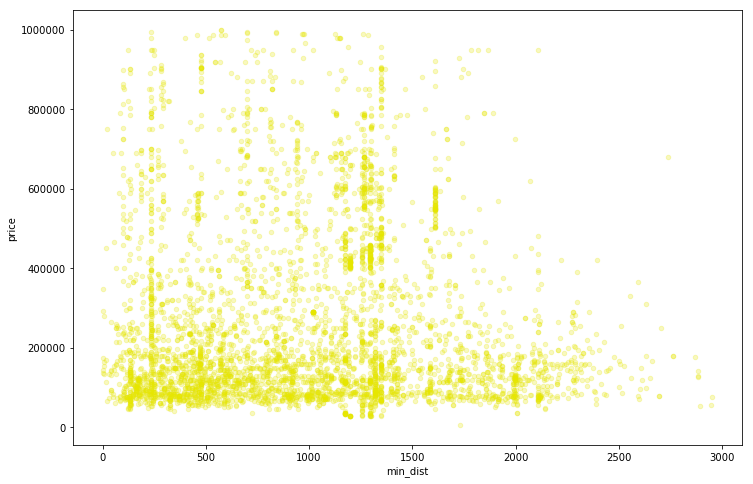

In [8]:
%matplotlib inline
propRecorridoH1 = propRecorridoH[propRecorridoH['price']< 1000000]
propRecorridoH2 = propRecorridoH1[propRecorridoH1['min_dist']< 3000]
propRecorridoH2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color=(0.9,0.9,0.0))